# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса **Яндекс Недвижимость** — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Определим рыночную стоимость объектов недвижимости. Проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Описание данных**

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Изучаем общую информацию в данных

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

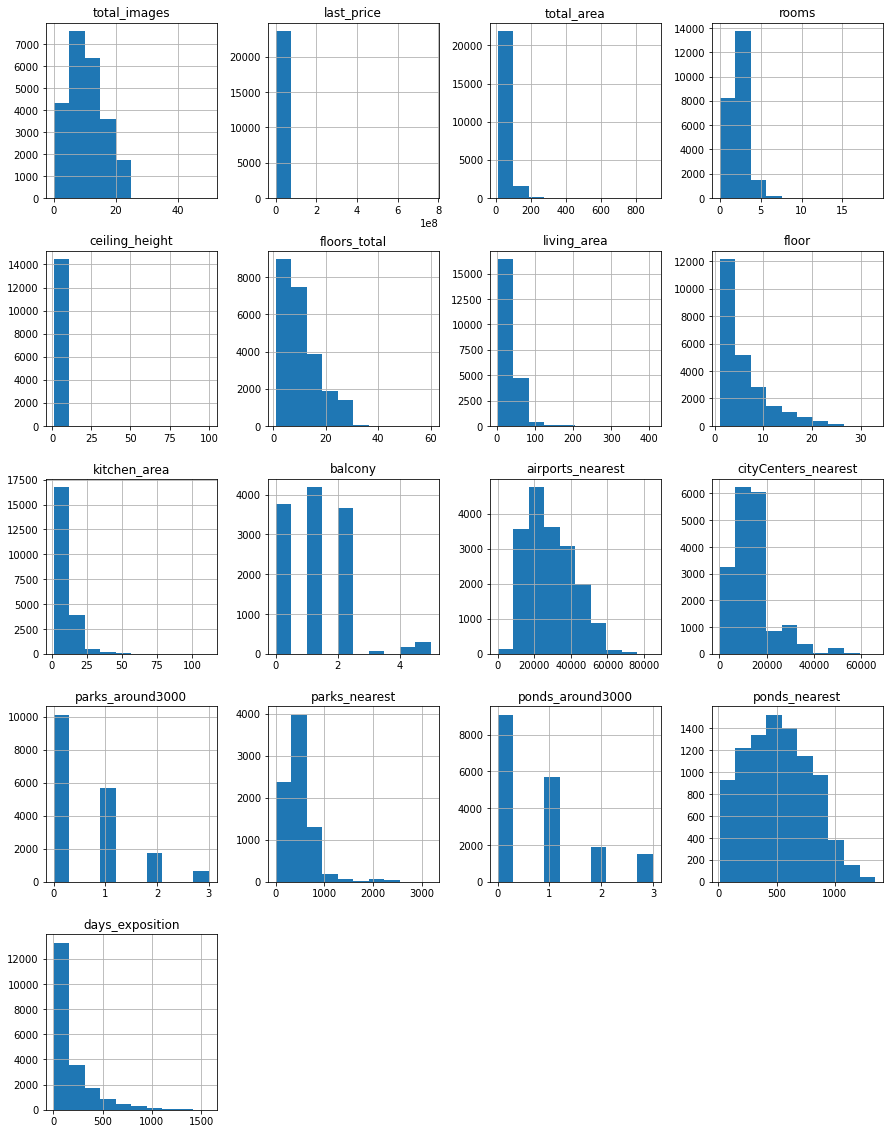

In [3]:
import pandas as pd
import datetime as dt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head(5))
data.hist(figsize=(15,20))

Построив гистограммы для каждого числового параметра (столбца) таблицы, мы можем наблюдать целостную картину об данных. А также можем увидеть приблизительный разброс данных

Посмотрим на общую информацию о таблице

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Как мы можем заметить данные не обделены пропусками. Следующим шагом обработаем пропуски

### Выполним предобработку данных

Начнем обрабатывать пропускт по порядку. Из информации о таблице мы видим, что в ceiling_height есть пропуски. Не все указывают высоту потолков в квартире, а может и не знают или не помнят. Посмотрим на уникальные значения столбца


In [5]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Высота указана в метрах, но встречаются квартиры с потолком 26/22/25 и даже 100 метров. Наводит на подозрение, что это невозможно. Скорее всего, при указании высоты потолка люди не ставили запятую. Попробуем высоту потолков выше 10 метров поделить на 10, чтобы запятая "встала на место"

In [6]:
fltr = data['ceiling_height'] > 10
data.loc[fltr, 'ceiling_height'] = data.loc[fltr, 'ceiling_height'] / 10

Проверим, что теперь нет выбивающихся из общей картины значений. Даже если у нас встретятся значение 1 или 1.03м что тоже не похоже на правду, то при анализе данных мы просто отбросим эти значения

In [7]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

Далее по списку переходим к количесвту этажей в здании. Тут мы видим что floors_total указаны не везде. В целом, для анализа важнее этаж, на которой находится квартира, нежели количество этажей в доме, поэтому просто проверим, что в столбце не содержится неправильных значений

In [8]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

Заполним пропущенные значения на среднее. В данном случае параметр не важный, поэтому не имеет разницы заполнять его средним или медианным значением. Как мы видим, встречаются нецелые числа в списке, чего быть не может, следовательно, нужно изминть тип данныъ на int

In [9]:
data['floors_total'].isna().sum()

86

In [10]:
data.loc[data['floors_total'].isna(),'floors_total'] = data['floors_total'].mean()
    
data['floors_total'] = data['floors_total'].astype('int64')
print(data['floors_total'].mean())
print(data['floors_total'].unique())

10.671378539178868
[16 11  5 14 12 26 24 27  9  6 17 25  3 23 19 18  4 22  8  2 10  7 13 15
 20 28 36 21 35 34 60  1 29 33 52 37]


Переходим к следующему столбцу с пропусками living_area. Не везде указывают жилую площадь, но она нам нужна для анализа данных, поэтому необходимо пустующие значения заменить на медианное по количествам комнат. Для начала посмотрим на количество пропущенных значений столбца 

In [11]:
data['living_area'].isna().sum()

1903

Проверим, что в rooms все в порядке

In [12]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Заполним пропуски по количеству комнат медианным значением и проверимся

In [13]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room)&(data['living_area'].isna()),'living_area'] = \
    data.loc[(data['rooms'] == room),'living_area'].median()
data['living_area'].isna().sum()

0

Посмотрим, что есть в столбце is apartment. Выведем пропущенные значения

In [14]:
data['is_apartment'].isna().sum()

20924

In [15]:
print(data['is_apartment'].unique())
data['is_apartment'].value_counts()


[nan False True]


False    2725
True       50
Name: is_apartment, dtype: int64

Скорее всего, пропуски в графе Апартаменты являются квартирами. Люди просто не заполняли данную графу, следовательно, нужно придать пропусками значение False, а также поменяем тип данных на булевой

In [16]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False
print(data['is_apartment'])
data['is_apartment'].isna().sum()

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: object


0

In [17]:
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [18]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Переходим к площади кухни. Тут тоже есть пропуски. Заполнять пропуски медианой по всему датафрейму нецелесообразно, ведь квартиры бывают разными. В малокомнатных квартирах кухня наверняка меньше, чем в многоквартирных. Заполним пропуски средней площаью кухни по команатам аналогично с жил. площадью

In [19]:
for kitchen in data['rooms'].unique():
    data.loc[(data['rooms'] == kitchen)&(data['kitchen_area'].isna()),'kitchen_area'] = \
    data.loc[(data['rooms'] == kitchen),'kitchen_area'].median()
data['kitchen_area'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


197

Цикл не рассчитвает значения медианной площади кухни для некоторых значений комнат. Логично предположить, что объявления без комнат (rooms=0) не имеют и кухонь. Проверим гипотезу

In [20]:
data.loc[data['rooms'] == 0]['kitchen_area'].unique()

array([nan])

Бинго. Значит, как раз те самые 197 пустых значений. Скорее всего, это либо бетонный каркас без планировки, либо и вовсе нежилое с точки срезния документов помещение. В любом случае, мы теперь понимаем, что это пропуски заполнять не нужно

In [21]:
data['balcony'].isna().sum()


11519

Много пропусков в графе Балконы, это значит, что в квартире их не было, отсюда и пропуски. Заменим все пропуски на нули и изменим тип данных на int 

In [22]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int64')
data['balcony'].isna().sum()

0

In [23]:
data['ceiling_height'].isna().sum()

9195

In [24]:
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()
print(data['ceiling_height'].isna().sum())
data['ceiling_height'].value_counts() #Проверим на всякий случай

0


2.65     9871
2.50     3522
2.60     1647
2.70     1582
3.00     1112
         ... 
3.59        1
4.90        1
10.00       1
2.49        1
4.65        1
Name: ceiling_height, Length: 176, dtype: int64

In [25]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

В названии населенных пунктов есть неявные дубликаты. Обработаем их: заменим ё на е

In [26]:
data['locality_name'].nunique()

364

In [27]:
data['locality_name'] = data['locality_name'].replace(['поселок городского типа ','посёлок ','посёлок городского типа ','деревня ','село ','поселок ','садовое товарищество ','поселок городского типа ','поселок станции ','городской посёлок ','коттеджный поселок ','городской поселок ','посёлок станции ','городской '],'', regex=True)
data['locality_name'].head()

0    Санкт-Петербург
1             Шушары
2    Санкт-Петербург
3    Санкт-Петербург
4    Санкт-Петербург
Name: locality_name, dtype: object

In [28]:
data['locality_name'].nunique()

320

In [29]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'городского типа Лебяжье',
       'городского типа Сиверский', 'Молодцово', 'Кузьмоловский',
       'Новая Ропша', 'Павловск', 'Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино',
       'Ефимовский', 'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское',
       'Красное Село', 'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово',
       'Новый Свет', 'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', 'Павлово', 'Оредеж', 'Копорье',
       'городского типа Красный Бор', 'Молодёжное', 'Тихвин', 'Поб

Изменим тип данных в столбцах, где нужны лишь целочисленные данные

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Заполним пропуски и проверим в стоблцах ponds_around3000, parks_around3000 

In [31]:
data['parks_around3000'] = data['parks_around3000'].fillna('0')
data['ponds_around3000'] = data['ponds_around3000'].fillna('0')
print(data['parks_around3000'].isna().sum())
print(data['ponds_around3000'].isna().sum())
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')


0
0


In [32]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,45.0,9,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


Проверим датафрейм на дубликаты и удалим, если они есть

In [33]:
data.duplicated().sum()

0

Проверим конечную таблицу

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Добавляем в таблицу новые столбцы

In [35]:
data['coast_meter2'] = data['last_price']/data['total_area']
data['coast_meter2'] = data['coast_meter2'].round(2)
data['coast_meter2']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: coast_meter2, Length: 23699, dtype: float64

Добавим столбец со стоимостью квадратного метра, округлив до сотых

In [36]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coast_meter2,week_day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018


Создаем столбцы с днями недели, месяцем и годом выставления объявления на площадку.

In [37]:
def floor_category(floor):
    if floor['floor'] == 1: return 'первый'
    if floor['floor'] == floor['floors_total']: return 'последний'
    return 'другой'

data['floor_category'] = data.apply(floor_category, axis=1)
data['floor_category'].head()

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_category, dtype: object

Добавили столбец с типами этажей

In [38]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'].round(0)

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km, Length: 23699, dtype: float64

### Проводим исследовательский анализ данных

#### Последовательно рассмотрим следующие параметры на гистограмме:
-общая площадь;
-жилая площадь;
-площадь кухни;
-цена объекта;
-количество комнат;
-высота потолков;
-тип этажа квартиры («первый», «последний», «другой»);
-общее количество этажей в доме;
-расстояние до центра города в метрах;
-расстояние до ближайшего парка

<AxesSubplot:>

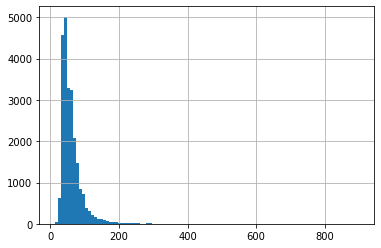

In [39]:
data['total_area'].hist(bins=100)

In [40]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

count    23468.000000
mean        58.155629
std         26.469479
min         12.000000
25%         40.000000
50%         51.900000
75%         68.900000
max        199.200000
Name: total_area, dtype: float64

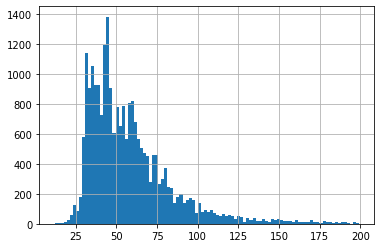

In [41]:
data[data['total_area'] < 200]['total_area'].hist(bins=100)
data[data['total_area'] < 200]['total_area'].describe()

На основе данных гистограммы откинем значения площади квартиры превыщающей 200 м2 и взглянем на гистограмму еще раз. При этом медиана практически не изменилась, а среднее уменьшилось на 2 м2. Значительно уменьшилось среднее отклонение.  Напоминает распределение Пуассона. Чтобы не изменять изначальную таблицу, будем сохранять нужные нам данные в отдельных переменных.

Далее посмотрим на гистограмму жилой площади

count    23699.000000
mean        34.321982
std         21.700627
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

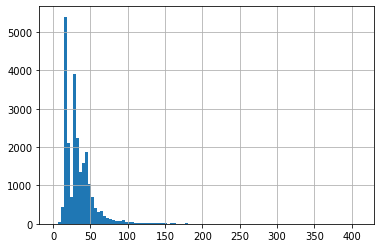

In [42]:
data['living_area'].hist(bins=100)
data['living_area'].describe()

За аномальные значение логично будет принять площадь выше 100 метров, поскольку после этого значения "график" стремится к нулю. Откинем верхние значения и взглянем еще раз

count    23323.000000
mean        32.562340
std         15.711628
min          2.000000
25%         18.300000
50%         30.000000
75%         42.000000
max         99.900000
Name: living_area, dtype: float64

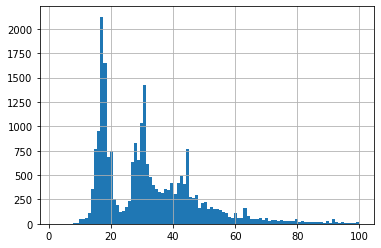

In [43]:
data[data['living_area'] < 100]['living_area'].hist(bins=100)
data[data['living_area'] < 100]['living_area'].describe()

График достаточно неоднородный, наблюдается провал в значинях примерно 20-25 м2. Возможно, это обусловлено тем, что с 25 и выше располагаются квартиры в привычном понимании, а ниже 20 студии. Закономерно немного уменьшилсоь среднее значение при неизменной медиане и квартилиях.

Далее изучим площадь кухни на гистограмме 

count    23502.000000
mean        10.464501
std          5.664289
min          1.300000
25%          7.300000
50%          9.040000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

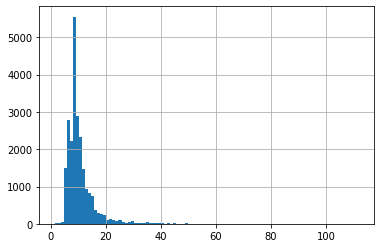

In [44]:
data['kitchen_area'].hist(bins=100)
data['kitchen_area'].describe()

Хотелось бы увидеть кухню 112 м2 вживую, однако для общего анализа такие хоромы не подойдут. По графику можно отбросить все значения превышающие 30 м2 и взглянуть на данные еще раз.

count    23119.000000
mean         9.972439
std          3.906214
min          1.300000
25%          7.200000
50%          9.040000
75%         11.300000
max         29.900000
Name: kitchen_area, dtype: float64

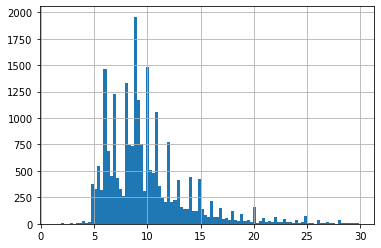

In [45]:
data[data['kitchen_area'] < 30]['kitchen_area'].hist(bins=100)
data[data['kitchen_area'] < 30]['kitchen_area'].describe()

Теперь мы получили объективную гистограмму, напоминающую распределение Пуассона. Закономерно чуть уменьшилось среднее значение при неизменной медиане и квартилиях

Далее рассмотрим цену объектов

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

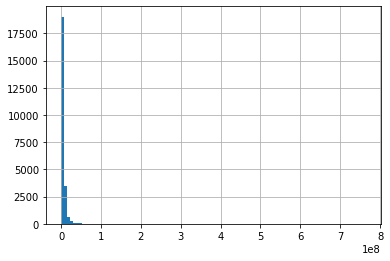

In [46]:
data['last_price'].hist(bins=100)
data['last_price'].describe()

Как мы видим, есть значения очень сильно выбывающиеся из общего списка, например максимальная стоимость объекта составляет аж 763 000 000 руб. При том, что верхняя квартилия Q3 составляет 6 800 000  руб, что на самом деле слишком мало, чтобы откинуть значения выше этого. Тогда попробуем посмотреть сколкьо всего квартир превышает 50млн руб. Если их окажется меньше 1 процентов, то возьмем 50 млн за верзнюю границу и откинем все лишнее

In [47]:
big_price = (data[data['last_price'] > 50000000].count()) / data['last_price'].count()
big_price['last_price']

0.005527659394911177

count    2.356100e+04
mean     5.986440e+06
std      4.918316e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.996890e+07
Name: last_price, dtype: float64

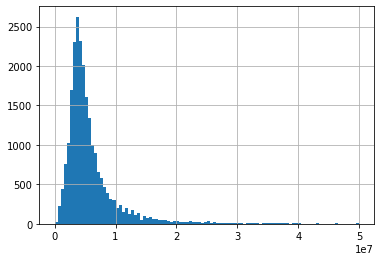

In [48]:
data[data['last_price'] < 50000000]['last_price'].hist(bins=100)
data[data['last_price'] < 50000000]['last_price'].describe()

Такой график куда наглядннее и читабельнее. Пик цен приходится на квартиры до 10 млн руб. Как правило - это студии, однушки, маленькие двушки. Мы наблюдаем распределение Пуассона.

Теперь рассмотрим на гистограмм по количеству комнат

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

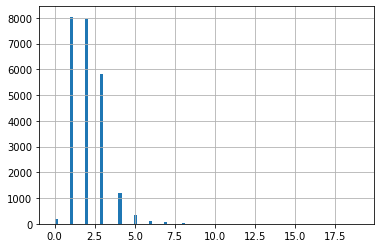

In [49]:
data['rooms'].hist(bins=100)
data['rooms'].describe()

Как мы можем наблюдать, квартир с 10 и более комнатами ничтожно мало для учета в анализе. Откинем лишние значения и посмотрим еще раз

count    23688.000000
mean         2.065603
std          1.051309
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

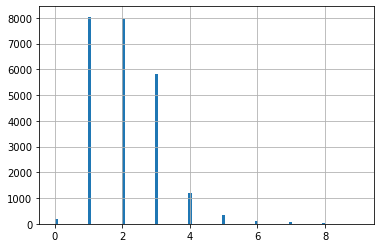

In [50]:
data[data['rooms'] < 10]['rooms'].hist(bins=100)
data[data['rooms'] < 10]['rooms'].describe()

Самые распространенные значения: 1, 2 и 3. Все как в жизни. Идем дальше

Теперь рассмотрим гистограмму восты потолков. Мы помним, что там около 14 тысяч пропусков, это очень много, но чем их следует заполнять? Ведь мысль распределить объекты по какому-либо параметру и посчитать медиану кажется крайне бредовой. Но почему-то я уверен, что заполнить придется все же, хоть я и не согласен с этим.

<AxesSubplot:>

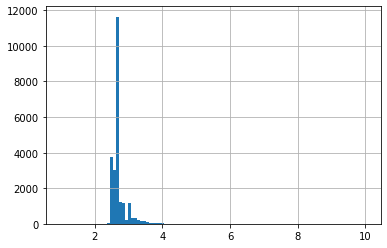

In [51]:
data['ceiling_height'].hist(bins=100)

Отбросим все значения, превышающие 4 метра и ниже 2

count    23592.000000
mean         2.691481
std          0.197325
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

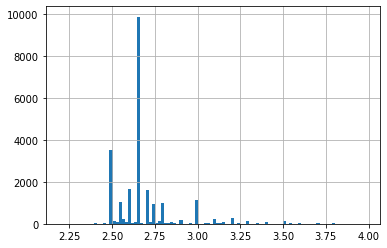

In [52]:
data[(data['ceiling_height'] < 4)&(data['ceiling_height'] > 2)]['ceiling_height'].hist(bins=100)
data[(data['ceiling_height'] < 4)&(data['ceiling_height'] > 2)]['ceiling_height'].describe()

Наблюдаем пик в 2,65 метра, что характерно для большинства панельных домов

Далее рассмотрим на распределение по типу этажа

<AxesSubplot:>

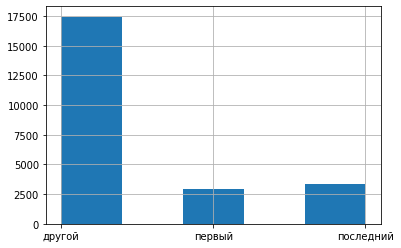

In [53]:
data['floor_category'].hist(bins=5)

Гистограмма по количеству этажей в доме

count    23699.000000
mean        10.671379
std          6.585316
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

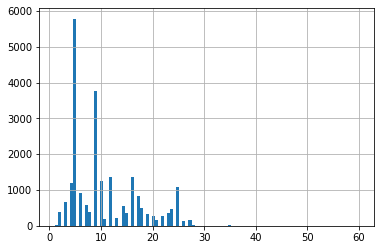

In [54]:
data['floors_total'].hist(bins=100)
data['floors_total'].describe()

Согласно графику можем смело откинуть все значения больше 30, поскольку их очень мало

count    23667.000000
mean        10.636625
std          6.518736
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

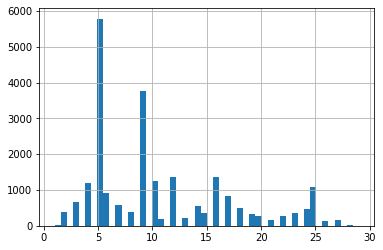

In [55]:
data[data['floors_total'] < 30]['floors_total'].hist(bins=50)
data[data['floors_total'] < 30]['floors_total'].describe()

Большинство квартир продаются в 5-этажках и 9-этажках. Продают квартиры новым владельцам прям под реновацию, ведь затем можно получить новую квартиру с площадью не меньше старой. А то и больше

Теперб рассмотрим расстояние до центра города. Возьмем наш столбец с километрами

<AxesSubplot:>

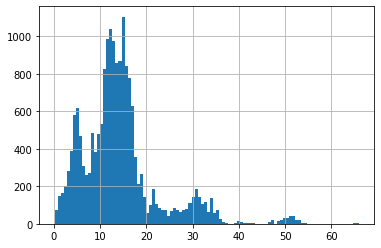

In [56]:
data['cityCenters_nearest_km'].hist(bins=100)

Большинство квартир находятся в пределах 20 км от центра. Далекие от центра объекты, возможно, являются загородными домами.

<AxesSubplot:>

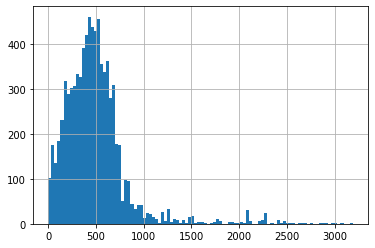

In [57]:
data['parks_nearest'].hist(bins=100)

По графику видно, что можно откинуть все значения, превыщающие 2500 метров, так как их очень мало

<AxesSubplot:>

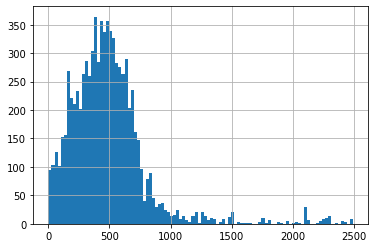

In [58]:
data[data['parks_nearest'] < 2500]['parks_nearest'].hist(bins=100)

В большинстве случаев до парка меньше километра, что определенно хорошо для объекта. Наблюдаем распределение Пуассона

#### Изучим гистограмму распредления по количеству дней в продаже

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

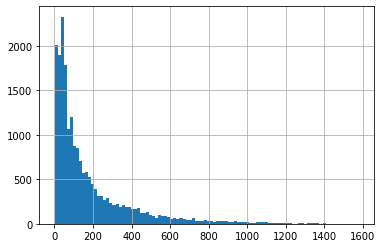

In [59]:
data['days_exposition'].hist(bins=100)
data['days_exposition'].describe()

Среднее - полгода, медианное значение - 3 месяца. Для объектов входящих в рыночную стоимость 3 месяца являются оптимальным временем продажи. Среднее сильно завышенно из-за супер дорогих объектов, продающихся годами. В данном случае слишком долгими объектами в продаже можно считать объекты, продающиеся более 600 дней, это почти 2 года. Такое встречается, когда квартиры либо находятся выше рыночной стоимости и владельу неважно, как долго она будет продаваться, либо квартира имеет проблемы (неузаконенная планировка, залог в банке и т.п.) из-за чего ее нельзя купить в ипотеку, а только за наличные. А как всем известно 95% сделок проходят с ипотекой. Объектов с 400-600 днями в продаже слишком много, чтобы от них избавиться, поэтому "долгими" назовем > 600 дней, "быстрыми" < медианы(три месяци)

Пересмотрев свои выводы, можем сказать следующее: быстрыми продаж можно назвать те, что находятся ниже первого квартиля (25%), то есть до 6 недель. 
Долгими продажами можно назвать те, что продавались дольше 300 дней, однако стоит проверить, какую долю занимают такие продажи. если процент невысокий (20% или ниже), то назовем их долгими.

In [60]:
((data[data['days_exposition'] > 300]['days_exposition'].count()) / (data['days_exposition'].count()) * 100).round(0)

19.0

Таких продаж 19%, следовательно, квартиры, продающиеся более 300 дней, можем назвать долгими

#### Изучим зависимость цен от слудующих параметров:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).

##### Начнем с общей площади

<AxesSubplot:xlabel='total_area'>

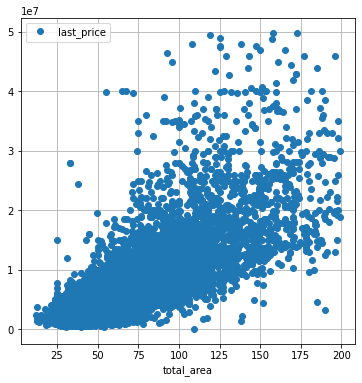

In [61]:
total_area_price = data.query('last_price < 50000000 and total_area <200')
total_area_price.plot(x='total_area', y = 'last_price', style='o', grid=True, figsize=(6,6))

Здесь мы видим прямопропорциональную зависимость между площадью и ценой объекта. Чем больше площадь - тем больше цена. Коэффициент корреляции положительный. Убедимся в этом

In [62]:
total_area_price['last_price'].corr(total_area_price['total_area'])

0.7674250774487252

##### Теперь перейдем к зависимости цены от жилой площади

0.6052668644889547

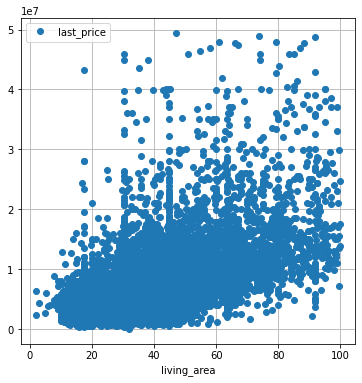

In [63]:
living_area_price = data.query('last_price < 50000000 and living_area <100')
living_area_price.plot(x='living_area', y = 'last_price', style='o', grid=True, figsize=(6,6))
living_area_price['last_price'].corr(living_area_price['living_area'])

Мы видим похожую картину, как и с площадью квартиры: чем больше жилая площадь - тем выше цена, однако график более приземистый, и коэффициент корреляции меньше, а значит цена зависит от площади жилой в меньшей степени, нежели от общей площади

##### Зависимость цены от площади кухни

0.5309824446900872

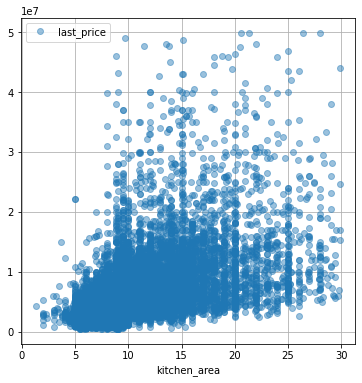

In [64]:
kitchen_area_price = data.query('last_price < 50000000 and kitchen_area <30')
kitchen_area_price.plot(x='kitchen_area', y = 'last_price', style='o', grid=True, figsize=(6,6), alpha=0.45)
kitchen_area_price['last_price'].corr(kitchen_area_price['kitchen_area'])

Как и в прошлом примере мы видим все меньшую зависимость цены от площади кухни. Тут коэффициент корреляции еще ниже, чем у жилой площади

##### Зависимость цены от кличества комнат 

0.5104725853665948

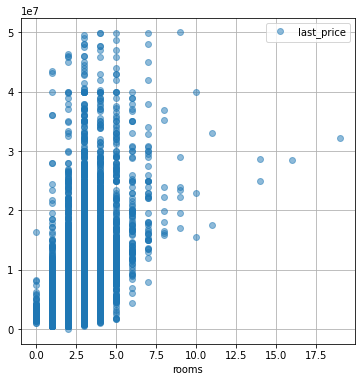

In [65]:
rooms = data.query('last_price < 50000000' )
rooms.plot(x='rooms', y='last_price', style='o',alpha=0.5, grid=True, figsize=(6,6))
rooms['last_price'].corr(rooms['rooms'])

По данному графику мы видим, что в случае 1, 2, 3, 4 и даже 5 комнтаных квартирах высота "плотного, яркого" столбца растет, однако во всех есть и равный ценовой диапазон, поэтому можно сделать следующий вывод: как правило, количество комнат не играют большой роли в стоимости квартиры. Большую роль будет играть общая плошадь квартиры и ряд других факторов (удаленность от центра, жилая площадь, инфраструктура и тп). В случаях, когда комнат ,больше 5 зависимость цены от кличества комнат прямая. Коэффициент корелляции положительный, а значит количество комнат все же играет роль стоимости цены, пусть и меньшую в сравнении с другими факторами

##### Зависимость цены от типа этажа 

<AxesSubplot:xlabel='floor_category'>

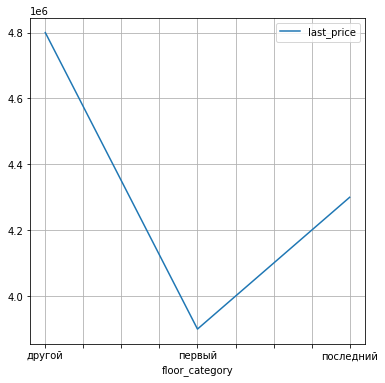

In [66]:
(
    data.query('last_price < 50000000')
    .pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot( grid=True, figsize=(6,6))
)

Отсюда мы наглядно видим, что квартиры на первом этаже - самые дешевые. Никто не хочет, чтобы их топили соседи в случае чего. Затем по цене идут квартиры последнего этажа. Если дом не монолитный, то это может стать головной болью для жильцов последних этажей из-за протечек и шумящей техники. Квартиры между первым и последним продаются дороже всего

##### Зависимость цены от дня недели, месяца и года выставления на продажу 

<AxesSubplot:xlabel='week_day'>

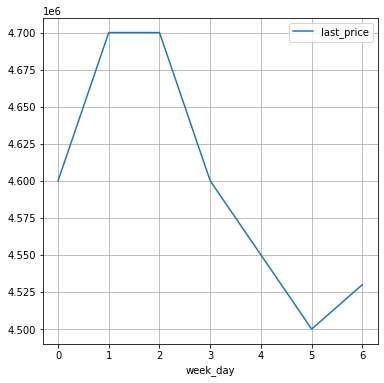

In [67]:
(
    data.query('last_price < 50000000')
    .pivot_table(index='week_day', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(6,6))
)

Интересная и неожиданная зависимоть получается. Выходи, квартиры выставленные на продажу в начале недели разительно дороже тех, что выкладывают на выходных. Пик приходится на вторник-среду, а падение в субботу

<AxesSubplot:xlabel='month'>

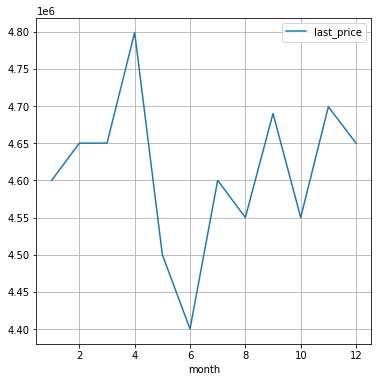

In [68]:
(
    data.query('last_price < 50000000')
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(6,6))
)

И тут мы видим занимательную статистику. Квартиры летом продаются дешевле, чем в другие времена года, при это пик приходится на весну (возможно, обострение играет тут свою роль). Рынок будто весной взлетает, после чего идет закономерное падение летом

<AxesSubplot:xlabel='year'>

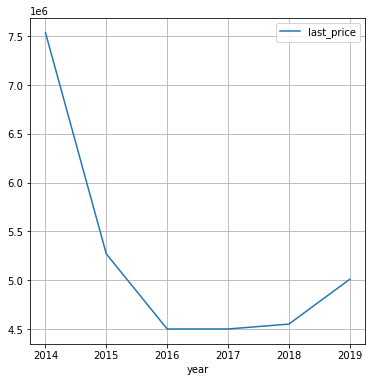

In [69]:
(
    data.query('last_price < 50000000')
    .pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(6,6))
)

Пик высоких цен приходился на 2014 год, скорее всего, еще до крымских событий, повлиявших на экономику страны, инфляцию и ,как следствие, покупательскую способность населения. После чего пошел сильный спад аж в 1,5 раза. Далее с 2016 года мы наблюдаем медленный рост цен.   

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [70]:
locality_df = data.pivot_table(index='locality_name', values='coast_meter2', aggfunc=['count','mean'])
locality_df.columns=['count','mean']
locality_df.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008793
Мурино,590,86087.512017
Кудрово,472,95324.930508
Шушары,440,78677.364318
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
Парголово,327,90175.913089
Гатчина,307,68746.146515


На основе нашей таблицы населенные пункты с самыми высокими ценами за квадратный метр - Санкт-Петербург и Пушкин. Среди населенных пунктов с самой низкой стоимостью за квадратный метр - Выборг, Всеволожск и Гатчина

#### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра. Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга. 

cityCenters_nearest_km
0.0     3.144912e+07
1.0     2.120672e+07
2.0     1.778832e+07
3.0     1.112658e+07
4.0     1.330428e+07
5.0     1.449912e+07
6.0     1.533842e+07
7.0     1.477515e+07
8.0     9.957717e+06
9.0     6.950659e+06
10.0    6.504119e+06
11.0    6.250815e+06
12.0    5.828545e+06
13.0    6.083141e+06
14.0    5.629101e+06
15.0    5.884751e+06
16.0    5.373131e+06
17.0    5.292395e+06
18.0    5.091331e+06
19.0    5.037675e+06
20.0    5.951465e+06
21.0    5.493469e+06
22.0    5.415524e+06
23.0    4.985376e+06
24.0    3.854430e+06
25.0    4.052840e+06
26.0    3.973013e+06
27.0    8.300000e+06
28.0    5.026429e+06
29.0    4.236667e+06
Name: last_price, dtype: float64


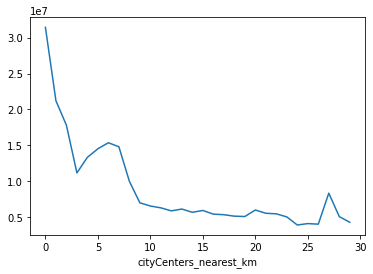

In [71]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0)
piter = data.query('locality_name == "Санкт-Петербург"')
piter = piter.groupby('cityCenters_nearest_km')['last_price'].mean()
piter.plot()
print(piter)

По графику и по данным мы видим, что удаленность от центра сильно влияет на цену объекта. Чем ближе к центру - тем дороже

### Общий вывод

Проведя исследовательский анализ данных по продаже квартир в **Санкт-Петербурге** и в **Ленинградской области**, мы сделали следующие выводы:

**На основе графиков мы выяснили, что цена напрямую зависит от многих факторов:**

1. Мы заметили прямопропорциональную зависимость между общей площадью и ценой объекта. **Чем больше общая площадь - тем больше цена**. То же спрведливо и для жилой площади, однако цена зависит от жилой площади в меньшей степени, нежели от общей площади. Еще меньшую зависимость мы увидели в площади кухни, хотя ее влияние игнорировать не стоит.
    
2. Смотря на цену квартир в зависимоти от количества комнат мы установили, что, как правило, **чем больше комнат, тем больше цена**, но решающую роль будет играть жилая площадь квартиры. Ведь бывают комнаты по площади больше некоторых квартир.  

3. Существенное влияние на цену квартиры оказвает этаж. Так дешевле всего продаются квартиры на 1 этаже. Так же последний этаж люди покупают неохотно, что обусловлено возможными проблемами с протечкой и/или сантехникой. **Дороже всего продаются квартиры между первым и последним**.
    
4. Далее мы рассмотрели зависимость цены от дня недели, месяца и года поступления в продажу:
    * Интересная и неожиданная зависимоть показали квартиры, выставленные на продажу в начале недели. Они разительно дороже тех, что выкладывают на выходных. Пик приходится на вторник-среду, а падение в субботу.
    
    * Квартиры летом продаются дешевле, чем в другие времена года, при это пик приходится на весну (возможно, обострение играет тут свою роль). Рынок будто весной взлетает, после чего идет закономерное падение летом.
    
    * Пик высоких цен приходился на 2014 год, скорее всего, еще до крымских событий, повлиявших на экономику страны, инфляцию и ,как следствие, покупательскую способность населения. После чего пошел сильный спад аж в 1,5 раза. Далее с 2016 года мы наблюдаем медленный рост цен.
    
На основе анализа населенные пункты с самыми высокими ценами за квадратный метр - **Санкт-Петербург** и **Пушкин**
. Среди населенных пунктов, пользующихся спросом и с самой низкой стоимостью за квадратный метр - **Выборг**, **Всеволожск** и **Гатчина**.
    Мы выяснили, что удаленность от центра сильно влияет на цену объекта. Чем ближе к центру - тем дороже.
    
Самыми главными **факторами**, влияющими на **цену квартиры**, является - ***общая площадь***, ***удаленность от центра и этаж***. Все остальные факторы играют свою роль, но в меньшей степени
